In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os, sys, csv

### About the dataset
dataset url: [Click](https://www.kaggle.com/jealousleopard/goodreadsbooks)

#### Context
This dataset has been taken from Kaggle. This dataset is about books from [Goodreads](https://www.goodreads.com/). The moto of the analysis is to find out good books based on some category such as superb, Too Good, Very Good, Good, Not bad. 

In [2]:
dataset= pd.read_csv('books.csv')
dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN


### Get Famous authors list
Here are top 30 author based on books number

In [3]:
author_absolute_frequency = dataset['authors'].value_counts()
author_relative_frequency = dataset['authors'].value_counts(normalize=True)*100

pd.DataFrame(data={'Absolute Frequency': author_absolute_frequency, 'Relative Frequency': author_relative_frequency}).head(30)

,Absolute Frequency,Relative Frequency
Agatha Christie,69,0.502952
Stephen King,66,0.481085
Orson Scott Card,48,0.349880
Rumiko Takahashi,46,0.335301
P.G. Wodehouse,42,0.306145
Terry Brooks,40,0.291566
Piers Anthony,34,0.247831
Margaret Weis-Tracy Hickman,33,0.240542
Dan Simmons,32,0.233253
J.R.R. Tolkien,31,0.225964


In [4]:
dataset.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count',
       'Unnamed: 10'],
      dtype='object')

### Get dataset which has rating greater than 0
We will count only those books which has some rating means that we will avoid books having 0 rating.

In [5]:
dataset_good = dataset[dataset['ratings_count'] > 0].copy()
dataset_good.head(20)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,439785960,9780439785969,eng,652,1944099,26249,NaN
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272,NaN
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,439682584,9780439682589,eng,2690,38872,154,NaN
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,976540606,9780976540601,en-US,152,18,1,NaN
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780439827607,eng,3342,27410,820,NaN
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780517226957,eng,815,3602,258,NaN
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,345453743,9780345453747,eng,815,240189,3954,NaN


In `average_rating` column there are some row which has wrong value. Since rating means number hance we will find out those rows and will replace all of them with 0 rating cause. 

In [6]:
dataset_good[dataset_good['average_rating'].str.len() > 4]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
4010,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr.-Sam B. Warner,3.57,674842111,9780674842113,en-US,236,55,NaN
5686,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien we...,3.6,1593600119,9781593600112,eng,400,25,4.0
7054,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9781563841552,eng,342,38,4.0
10599,34523,The Flying Sorcerers: More Comic Tales of Fantasy,Peter Haining-Roald Dahl-Terry Pratchett-Angel...,Jr.-C.S. Lewis-P.G. Wodehouse-Michael Moorcock...,3.98,1857237250,9781857237252,eng,383,2197,17.0
10666,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9780851742717,eng,49,0,0.0


In [7]:
dataset_good['average_rating'].replace('Jr.-Sam B. Warner','0', inplace=True)
dataset_good['average_rating'].replace('one of the founding members of this Tolkien website)-Verlyn Flieger-Turgon (=David E. Smith)','0', inplace=True)
dataset_good['average_rating'].replace('Rawles','0', inplace=True)
dataset_good['average_rating'].replace('Jr.-C.S. Lewis-P.G. Wodehouse-Michael Moorcock-L. Sprague de Camp-Fletcher Pratt-Eric Knight-Mervyn Peake-Piers Anthony-John Collier-Fredric Brown-Nelson S. Bond-Thomas M. Disch-Robert Bloch-Stephen Leacock-John Wyndham-Stanisław Lem-Cordwainer Smith-Robert Sheckley-William F. Nolan-Harry Harrison', inplace=True)
dataset_good['average_rating'].replace('Son & Ferguson','0', inplace=True)

In [8]:
dataset_good['average_rating'] = pd.to_numeric(dataset_good['average_rating'], errors='coerce')


In [9]:
mean_rating = dataset_good['average_rating'].mean()
mean_rating

3.939608232267549

In [10]:
mean_rating_dataset = dataset_good[dataset_good['average_rating'] >= mean_rating]

### Category Books
we calculated the mean value for `average_rating` column. Suppose that readers want to read books only which has rating above or equal of the mean rating. So lets make a category with the assumption.

In [11]:
def category_books(rating):
    if rating == 5.0:
        return 'Too Good'
    elif rating > 4.5 and rating <= 4.99:
        return 'Very Good'
    elif rating >= 4.00 and rating <=4.5:
        return 'Good'
    elif rating >= 3.5 and rating <= 3.99:
        return 'Not bad'

dataset_good['rating_category'] = dataset_good['average_rating'].apply(category_books)

In [12]:
rating_category_frequency = dataset_good['rating_category'].value_counts()
rating_category_frequency

Not bad      6735
Good         5748
Very Good     213
Too Good       23
Name: rating_category, dtype: int64

Here we see that, the amount of book which has rating 5.0 is 23 and which has rating between 3.5 to 3.99 is 6735. Lets see them in a plot.

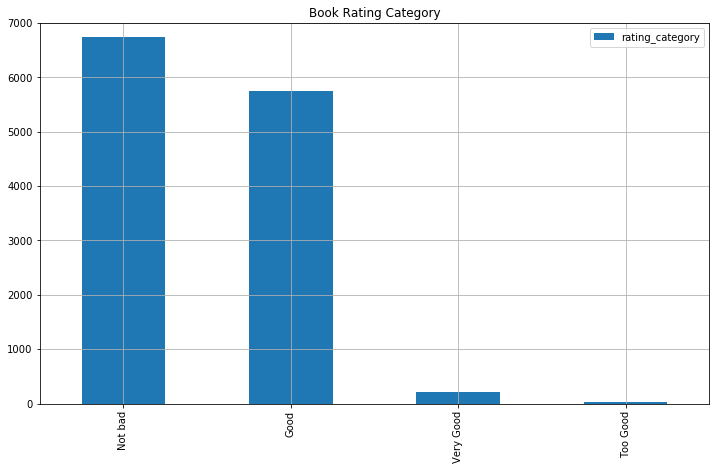

In [13]:
rating_category_frequency.plot(kind='bar',figsize=(12,7),title="Book Rating Category",legend=True, ylim=(0,7000), grid=True)
plt.show()

In [14]:
dataset_average = dataset_good[dataset_good['rating_category'].notnull()]

In [15]:
dataset_average['rating_category'].isnull().sum()

0

In [16]:
good_book_data = dataset_average[dataset_average['rating_category'].str.contains('Too Good|Very Good|Good')]

In [17]:
good_book_data.groupby('rating_category').count()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
rating_category,,,,,,,,,,,
Good,5748,5748,5748,5748,5748,5748,5748,5748,5748,5748,0
Too Good,23,23,23,23,23,23,23,23,23,23,0
Very Good,213,213,213,213,213,213,213,213,213,213,0


In [18]:
too_good_books = good_book_data.groupby('rating_category').get_group('Too Good')
too_good_books[['title','authors','average_rating','ratings_count','text_reviews_count']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count
879,Willem de Kooning: Late Paintings,Julie Sylvester-David Sylvester,5.0,1,0
963,Literature Circle Guide: Bridge to Terabithia:...,Tara MacCarthy,5.0,4,1
1442,Middlesex Borough (Images of America: New Jersey),Middlesex Borough Heritage Committee,5.0,2,0
1624,The Decoration of the Torre de la Parada (Corp...,Svetlana Alpers,5.0,1,0
2988,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,5.0,1,0
4940,Zone of the Enders: The 2nd Runner Official St...,Tim Bogenn,5.0,2,0
5788,The Diamond Color Meditation: Color Path to th...,John Diamond,5.0,5,3
6079,The Complete Theory Fun Factory: Music Theory ...,Ian Martin-Katie Elliott,5.0,1,0
6598,The Goon Show Volume 4: My Knees Have Fallen ...,NOT A BOOK,5.0,3,0
6600,The Goon Show Volume 11: He's Fallen in the W...,NOT A BOOK,5.0,2,0


In [19]:
very_good_books = good_book_data.groupby('rating_category').get_group('Very Good')
very_good_books[['title','authors','average_rating','ratings_count','text_reviews_count']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,1944099,26249
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,2149872,33964
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,38872,154
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,27410,820
22,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,97731,1536
27,The Lord of the Rings: Weapons and Warfare,Chris Smith-Christopher Lee-Richard Taylor,4.53,18934,43
152,100 Years of Lynchings,Ralph Ginzburg,4.63,81,4
181,The Gettysburg Address,Abraham Lincoln-Michael McCurdy,4.53,4967,69
314,Fullmetal Alchemist Vol. 9 (Fullmetal Alchemi...,Hiromu Arakawa-Akira Watanabe,4.57,8568,141
315,Fullmetal Alchemist Vol. 3 (Fullmetal Alchemi...,Hiromu Arakawa-Akira Watanabe,4.56,15748,274


In [20]:
good_books = good_book_data.groupby('rating_category').get_group('Good')
good_books[['title','authors','average_rating','ratings_count','text_reviews_count']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,6267,272
8,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,3602,258
9,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,240189,3954
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,4416,408
11,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams-Stephen Fry,4.22,1222,253
12,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,2801,192
13,A Short History of Nearly Everything,Bill Bryson-William Roberts,4.20,228522,8840
16,In a Sunburned Country,Bill Bryson,4.07,68213,4077


Till now I made some analysis based on `average_rating` columns. But I found some incondite dataset. Look for `Too Good` dataset above. Amount of `rating_count` is not so much. A book which has only 4 or 5 ratings, should not be a too good/ very good book. Another `Very Good` and `Good` books has so many rating count, which mean that so many people know about those books. So if a book is read by some many people then the someone can get some good idea about the book. That's why I made a decision to make a analysis based on `ratings_count` column. Let's do it.  

In [21]:
ratings_count_dataset = dataset_good[dataset_good['ratings_count'] >= 500].copy()

In [22]:
ratings_count_dataset.shape

(7248, 12)

In [23]:
ratings_count_dataset.sort_values(by=['ratings_count'],ascending=False).head(15)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10,rating_category
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,439554934,9780439554930,eng,320,5629932,70390,NaN,Good
12248,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9780316015844,eng,498,4367341,93619,NaN,Not bad
2000,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.26,618260307,9780618260300,eng,366,2364968,31664,NaN,Good
1717,5107,The Catcher in the Rye,J.D. Salinger,3.80,316769177,9780316769174,eng,277,2318478,42016,NaN,Not bad
340,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,1416524797,9781416524793,eng,736,2279854,20851,NaN,Not bad
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964,NaN,Very Good
5301,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPré,4.41,439064864,9780439064866,eng,341,2115562,32694,NaN,Good
2505,7613,Animal Farm,George Orwell,3.91,452284244,9780452284241,eng,122,2102616,29469,NaN,Not bad
25,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,618346252,9780618346257,eng,398,2009749,12784,NaN,Good
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,439358078,9780439358071,eng,870,1996446,27613,NaN,Good


Suppose people like book which have rating above 500. So I find out a dataset of books which have ratings above 500. Now let's make a category again but this time based on rating. So here I took some decision. If the book rating is among 500 and 10,000, I will call it `Not bad`. If the book rating is among 10,000 and 50,000 I will call it `Good`. If the book rating is among 50,000 and 10,00,000  I will call it `Very Good`. If the book rating is among 10,00,000 and 15,00,000  I will call it `Too Good`.  If the book rating is among 15,00,000 and 1,00,00,000  I will call it `Superb`.  

In [24]:
def category_books(rating):
    if rating > 1500000 and rating <= 10000000:
        return 'Superb'
    elif rating > 1000000 and rating <= 1500000:
        return 'Too Good'
    elif rating > 50000 and rating <=1000000:
        return 'Very Good'
    elif rating > 10000 and rating <= 50000:
        return 'Good'
    elif rating >=500 and rating <= 10000:
        return 'Not bad'

In [25]:
ratings_count_dataset['rating_category'] = ratings_count_dataset['ratings_count'].apply(category_books)

In [26]:
ratings_count_dataset['rating_category'].value_counts()

Not bad      4894
Good         1531
Very Good     791
Superb         18
Too Good       14
Name: rating_category, dtype: int64

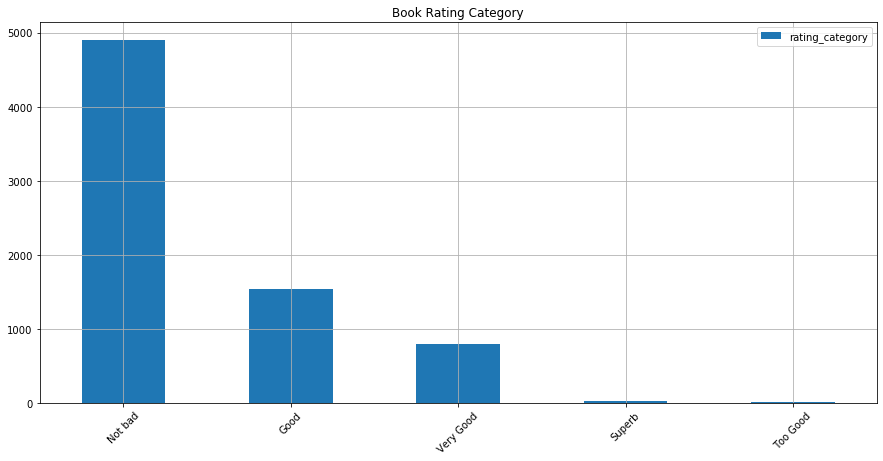

In [27]:
ratings_count_dataset['rating_category'].value_counts().plot(kind='bar',figsize=(15,7),title="Book Rating Category",legend=True, rot=45, grid=True)
plt.show()

In [28]:
ratings_count_dataset.groupby('rating_category').count()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,Unnamed: 10
rating_category,,,,,,,,,,,
Good,1531,1531,1531,1531,1531,1531,1531,1531,1531,1531,0
Not bad,4894,4894,4894,4894,4894,4894,4894,4894,4894,4894,0
Superb,18,18,18,18,18,18,18,18,18,18,0
Too Good,14,14,14,14,14,14,14,14,14,14,0
Very Good,791,791,791,791,791,791,791,791,791,791,0


In [29]:
superb_books = ratings_count_dataset.groupby('rating_category').get_group('Superb')
superb_books[['title','authors','average_rating','ratings_count','text_reviews_count','rating_category']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count,rating_category
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,1944099,26249,Superb
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,1996446,27613,Superb
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,5629932,70390,Superb
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,2149872,33964,Superb
25,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.35,2009749,12784,Superb
313,The Alchemist,Paulo Coelho-Alan R. Clarke-Özdemir İnce,3.85,1592632,54668,Superb
324,Of Mice and Men,John Steinbeck,3.86,1654353,23959,Superb
340,Angels & Demons (Robert Langdon #1),Dan Brown,3.88,2279854,20851,Superb
343,The Da Vinci Code (Robert Langdon #2),Dan Brown,3.82,1588890,35316,Superb
1717,The Catcher in the Rye,J.D. Salinger,3.80,2318478,42016,Superb


In [30]:
too_good_books = ratings_count_dataset.groupby('rating_category').get_group('Too Good')
too_good_books[['title','authors','average_rating','ratings_count','text_reviews_count','rating_category']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count,rating_category
330,Memoirs of a Geisha,Arthur Golden,4.10,1301305,19452,Too Good
664,Little Women,Louisa May Alcott,4.06,1402458,15525,Too Good
1014,The Adventures of Huckleberry Finn,Mark Twain-Guy Cardwell-John Seelye,3.81,1022438,11005,Too Good
1211,The Giver,Lois Lowry,4.12,1464909,54469,Too Good
1724,Brave New World,Aldous Huxley-Felisberto Albuquerque,3.98,1173739,18665,Too Good
2077,Wuthering Heights,Emily Brontë-Richard J. Dunn-David Timson-Char...,3.84,1041597,20192,Too Good
3293,Jane Eyre,Charlotte Brontë-Michael Mason-João Gaspar Ro...,4.11,1328143,26386,Too Good
5321,The Notebook (The Notebook #1),Nicholas Sparks,4.08,1090301,15327,Too Good
6365,The Book Thief,Markus Zusak,4.37,1410666,84237,Too Good
6524,Eat Pray Love,Elizabeth Gilbert,3.54,1309623,47291,Too Good


In [31]:
very_good_books = ratings_count_dataset.groupby('rating_category').get_group('Very Good')
very_good_books[['title','authors','average_rating','ratings_count','text_reviews_count','rating_category']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count,rating_category
9,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,240189,3954,Very Good
13,A Short History of Nearly Everything,Bill Bryson-William Roberts,4.20,228522,8840,Very Good
16,In a Sunburned Country,Bill Bryson,4.07,68213,4077,Very Good
20,Notes from a Small Island,Bill Bryson,3.92,76476,3159,Very Good
22,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,J.R.R. Tolkien,4.59,97731,1536,Very Good
32,Hatchet,Gary Paulsen,3.70,254827,11346,Very Good
64,Heidi,Johanna Spyri-Beverly Cleary-Angelo Rinaldi,3.98,150657,2175,Very Good
72,Dune Messiah (Dune Chronicles #2),Frank Herbert,3.87,96649,2306,Very Good
76,Children of Dune (Dune Chronicles #3),Frank Herbert,3.92,84276,1370,Very Good
78,The Power of One (The Power of One #1),Bryce Courtenay,4.35,66687,4445,Very Good


In [32]:
good_books = ratings_count_dataset.groupby('rating_category').get_group('Good')
good_books[['title','authors','average_rating','ratings_count','text_reviews_count','rating_category']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count,rating_category
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,38872,154,Good
7,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,27410,820,Good
17,I'm a Stranger Here Myself: Notes on Returning...,Bill Bryson,3.90,47490,2153,Good
18,The Lost Continent: Travels in Small Town America,Bill Bryson,3.83,43779,2146,Good
19,Neither Here nor There: Travels in Europe,Bill Bryson,3.87,46397,2127,Good
21,The Mother Tongue: English and How It Got That...,Bill Bryson,3.94,26672,1986,Good
27,The Lord of the Rings: Weapons and Warfare,Chris Smith-Christopher Lee-Richard Taylor,4.53,18934,43,Good
43,The Known World,Edward P. Jones,3.83,28962,2576,Good
67,What to Expect the First Year (What to Expect),Heidi Murkoff-Sharon Mazel-Heidi Murkoff-Arlen...,3.88,11489,658,Good
71,Chapterhouse: Dune (Dune Chronicles #6),Frank Herbert,3.90,38651,552,Good


In [33]:
not_bad_books = ratings_count_dataset.groupby('rating_category').get_group('Not bad')
not_bad_books[['title','authors','average_rating','ratings_count','text_reviews_count','rating_category']].head(10)

,title,authors,average_rating,ratings_count,text_reviews_count,rating_category
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,6267,272,Not bad
8,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,3602,258,Not bad
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,4416,408,Not bad
11,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams-Stephen Fry,4.22,1222,253,Not bad
12,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,2801,192,Not bad
14,Bill Bryson's African Diary,Bill Bryson,3.43,6993,470,Not bad
15,Bryson's Dictionary of Troublesome Words: A Wr...,Bill Bryson,3.88,2020,124,Not bad
23,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.49,1670,91,Not bad
24,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien,4.49,2819,139,Not bad
26,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien-Alan Lee,4.49,1606,139,Not bad


After analysis based on `rating_count` columns I found books with category which I made before. Now the situation is so much acceptable. Cause a book which is from `Superb` category have so much ratings, a book which is from `Too Good` category have so much ratings but less than `Superb` category and so on. So now you can take book from any category as your wish. Cause now you know about the category, you know the rating ranges. So enjoy!!